In [1]:
import pandas as pd
import numpy as np
from Preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix

In [2]:
data = getDFcleanedFulled()
data

,Title,Company,Location,TypeContrat,Salary,Description,Date,Link,TypeContrat_CDI,TypeContrat_Temps plein,TypeContrat_Apprentissage,TypeContrat_Contrat pro,TypeContrat_CDD,TypeContrat_Intérim,TypeContrat_Temps partiel,TypeContrat_Stage,TypeContrat_Indépendant
0,Data Scientist,Malakoff Humanis,Paris,"Apprentissage, Contrat pro",notfound,Contrat\r\nALTERNANCE\r\nFinalité du poste\r\n...,2020-05-22 14:41:13.743143,/pagead/clk?mo=r&ad=-6NYlbfkN0BfLf6vlT6l4ABp3X...,0,0,1,1,0,0,0,0,0
1,Data Scientist,Jellysmack,Paris,"Temps plein, CDI",notfound,Nous continuons de recruter et avons adapté no...,2020-05-01 14:41:13.744144,/pagead/clk?mo=r&ad=-6NYlbfkN0B8n3TtewkfrSQLVL...,1,1,0,0,0,0,0,0,0
2,Direction,Castelis,Paris,notfound,50000,"Présentation de la société Castelis conçoit, d...",2020-04-26 14:41:13.744144,/pagead/clk?mo=r&ad=-6NYlbfkN0Bl_GJvjV7T_nyT7Y...,0,0,0,0,0,0,0,0,0
3,Data Scientist,BNP Paribas,Paris,"Temps plein, Stage",notfound,ASSISTANT DATA SCIENTIST - STAGE 3 MOIS H/F (N...,2020-05-26 14:41:13.744144,/rc/clk?jk=dc84057ced14dfad&fccid=1392500f835b...,0,1,0,0,0,0,0,1,0
4,Data Scientist,NEOBRAIN,Paris,"Temps plein, CDI",notfound,Neobrain développe des solutions digitales int...,2020-05-26 14:41:13.744144,/company/NEOBRAIN/jobs/Data-Scientist-dfce81a4...,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Dev Web,Exakis,Lyon,CDI,notfound,"Exakis Nelite, entité du groupe Magellan Partn...",2020-04-25 14:41:22.928934,/rc/clk?jk=2492975828792445&fccid=74b179ae010f...,1,0,0,0,0,0,0,0,0
1021,Dev Back end,Apside,Lyon,notfound,notfound,Et si vous étiez prêt pour un challenge qui so...,2020-04-25 14:41:22.928934,/rc/clk?jk=5a58da742f83dea9&fccid=c4b1242d6123...,0,0,0,0,0,0,0,0,0
1022,Data Analyst,Crédit mutuel,Lyon,CDI,notfound,Les équipes « Ergonomie et Services Distants »...,2020-04-25 14:41:22.928934,/rc/clk?jk=7583f6ab09cd15e3&fccid=064584719361...,1,0,0,0,0,0,0,0,0
1023,developpeur,AXOPEN,Lyon,"Temps plein, CDI",notfound,"Pour toi, Android est le meilleur OS de tous l...",2020-05-19 14:41:22.929932,/company/AXOPEN/jobs/D%C3%A9veloppeur-Android-...,1,1,0,0,0,0,0,0,0


In [3]:
data['Title'].value_counts()

Data Analyst              297
developpeur               283
Dev Web                   258
Data Scientist            217
Data Engineer             178
Ingénieur                 153
Machine Learning          117
autres                    116
Business Intelligence      95
Dev Back end               88
Consultant                 87
Direction                  71
Dev Front end              52
Data                       46
Big Data                   41
Manager                    31
Experience Utilisateur     21
Admin reseau               10
Marketing                   8
Cyber sécurity              8
Bio-Informatique            5
Scrum                       3
trésorier                   2
Name: Title, dtype: int64

- je recupere l'occurence de chaque mots dans les descriptions, et jen fais un DF 

In [20]:
def getdummiesmots(data):
    stop_words= ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelqu","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô","of","for","at","in","and","the","to",'be',"it","we","an","are","a's" , "able" , "about" , "above" , "according" , "accordingly" , "across" , "actually" , "after" , "afterwards" , "again" , "against" , "ain't" , "all" , "allow" , "allows" , "almost" , "alone" , "along" , "already" , "also" , "although" , "always" , "am" , "among" , "amongst" , "an" , "and" , "another" , "any" , "anybody" , "anyhow" , "anyone" , "anything" , "anyway" , "anyways" , "anywhere" , "apart" , "appear" , "appreciate" , "appropriate" , "are" , "aren't" , "around" , "as" , "aside" , "ask" , "asking" , "associated" , "at" , "available" , "away" , "awfully" , "be" , "became" , "because" , "become" , "becomes" , "becoming" , "been" , "before" , "beforehand" , "behind" , "being" , "believe" , "below" , "beside" , "besides" , "best" , "better" , "between" , "beyond" , "both" , "brief" , "but" , "by" , "c'mon" , "c's" , "came" , "can" , "can't" , "cannot" , "cant" , "cause" , "causes" , "certain" , "certainly" , "changes" , "clearly" , "co" , "com" , "come" , "comes" , "concerning" , "consequently" , "consider" , "considering" , "contain" , "containing" , "contains" , "corresponding" , "could" , "couldn't" , "course" , "currently" , "definitely" , "described" , "despite" , "did" , "didn't" , "different" , "do" , "does" , "doesn't" , "doing" , "don't" , "done" , "down" , "downwards" , "during" , "each" , "edu" , "eg" , "eight" , "either" , "else" , "elsewhere" , "enough" , "entirely" , "especially" , "et" , "etc" , "even" , "ever" , "every" , "everybody" , "everyone" , "everything" , "everywhere" , "ex" , "exactly" , "example" , "except" , "far" , "few" , "fifth" , "first" , "five" , "followed" , "following" , "follows" , "for" , "former" , "formerly" , "forth" , "four" , "from" , "further" , "furthermore" , "get" , "gets" , "getting" , "given" , "gives" , "go" , "goes" , "going" , "gone" , "got" , "gotten" , "greetings" , "had" , "hadn't" , "happens" , "hardly" , "has" , "hasn't" , "have" , "haven't" , "having" , "he" , "he's" , "hello" , "help" , "hence" , "her" , "here" , "here's" , "hereafter" , "hereby" , "herein" , "hereupon" , "hers" , "herself" , "hi" , "him" , "himself" , "his" , "hither" , "hopefully" , "how" , "howbeit" , "however" , "i'd" , "i'll" , "i'm" , "i've" , "ie" , "if" , "ignored" , "immediate" , "in" , "inasmuch" , "inc" , "indeed" , "indicate" , "indicated" , "indicates" , "inner" , "insofar" , "instead" , "into" , "inward" , "is" , "isn't" , "it" , "it'd" , "it'll" , "it's" , "its" , "itself" , "just" , "keep" , "keeps" , "kept" , "know" , "known" , "knows" , "last" , "lately" , "later" , "latter" , "latterly" , "least" , "less" , "lest" , "let" , "let's" , "like" , "liked" , "likely" , "little" , "look" , "looking" , "looks" , "ltd" , "mainly" , "many" , "may" , "maybe" , "me" , "mean" , "meanwhile" , "merely" , "might" , "more" , "moreover" , "most" , "mostly" , "much" , "must" , "my" , "myself" , "name" , "namely" , "nd" , "near" , "nearly" , "necessary" , "need" , "needs" , "neither" , "never" , "nevertheless" , "new" , "next" , "nine" , "no" , "nobody" , "non" , "none" , "noone" , "nor" , "normally" , "not" , "nothing" , "novel" , "now" , "nowhere" , "obviously" , "of" , "off" , "often" , "oh" , "ok" , "okay" , "old" , "on" , "once" , "one" , "ones" , "only" , "onto" , "or" , "other" , "others" , "otherwise" , "ought" , "our" , "ours" , "ourselves" , "out" , "outside" , "over" , "overall" , "own" , "particular" , "particularly" , "per" , "perhaps" , "placed" , "please" , "plus" , "possible" , "presumably" , "probably" , "provides" , "que" , "quite" , "qv" , "rather" , "rd" , "re" , "really" , "reasonably" , "regarding" , "regardless" , "regards" , "relatively" , "respectively" , "right" , "said" , "same" , "saw" , "say" , "saying" , "says" , "second" , "secondly" , "see" , "seeing" , "seem" , "seemed" , "seeming" , "seems" , "seen" , "self" , "selves" , "sensible" , "sent" , "serious" , "seriously" , "seven" , "several" , "shall" , "she" , "should" , "shouldn't" , "since" , "six" , "so" , "some" , "somebody" , "somehow" , "someone" , "something" , "sometime" , "sometimes" , "somewhat" , "somewhere" , "soon" , "sorry" , "specified" , "specify" , "specifying" , "still" , "sub" , "such" , "sup" , "sure" , "t's" , "take" , "taken" , "tell" , "tends" , "th" , "than" , "thank" , "thanks" , "thanx" , "that" , "that's" , "thats" , "the" , "their" , "theirs" , "them" , "themselves" , "then" , "thence" , "there" , "there's" , "thereafter" , "thereby" , "therefore" , "therein" , "theres" , "thereupon" , "these" , "they" , "they'd" , "they'll" , "they're" , "they've" , "think" , "third" , "this" , "thorough" , "thoroughly" , "those" , "though" , "three" , "through" , "throughout" , "thru" , "thus" , "to" , "together" , "too" , "took" , "toward" , "towards" , "tried" , "tries" , "truly" , "try" , "trying" , "twice" , "two" , "un" , "under" , "unfortunately" , "unless" , "unlikely" , "until" , "unto" , "up" , "upon" , "us" , "use" , "used" , "useful" , "uses" , "using" , "usually" , "value" , "various" , "very" , "via" , "viz" , "vs" , "want" , "wants" , "was" , "wasn't" , "way" , "we" , "we'd" , "we'll" , "we're" , "we've" , "welcome" , "well" , "went" , "were" , "weren't" , "what" , "what's" , "whatever" , "when" , "whence" , "whenever" , "where" , "where's" , "whereafter" , "whereas" , "whereby" , "wherein" , "whereupon" , "wherever" , "whether" , "which" , "while" , "whither" , "who" , "who's" , "whoever" , "whole" , "whom" , "whose" , "why" , "will" , "willing" , "wish" , "with" , "within" , "without" , "won't" , "wonder" , "would" , "wouldn't" , "yes" , "yet" , "you" , "you'd" , "you'll" , "you're" , "you've" , "your" , "yours" , "yourself" , "yourselves" , "zero",'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
    vektor = CountVectorizer(stop_words=stop_words)
    Descroccurence = vektor.fit_transform(data['Description'])
    Descroccurence = pd.DataFrame(Descroccurence.toarray(),columns= vektor.get_feature_names())
    #Je récupere les 200 mots les plus présents
    x = Descroccurence.sum()
    listed = x.sort_values(ascending=False)[:200]
    keepcol = listed.keys()
    keepcol = Descroccurence[keepcol]
    return keepcol

In [5]:
keepcol= getdummiesmots(data)

- J'applique une cluserisation sur ces données afin de tirer du sens de ma features déscription 

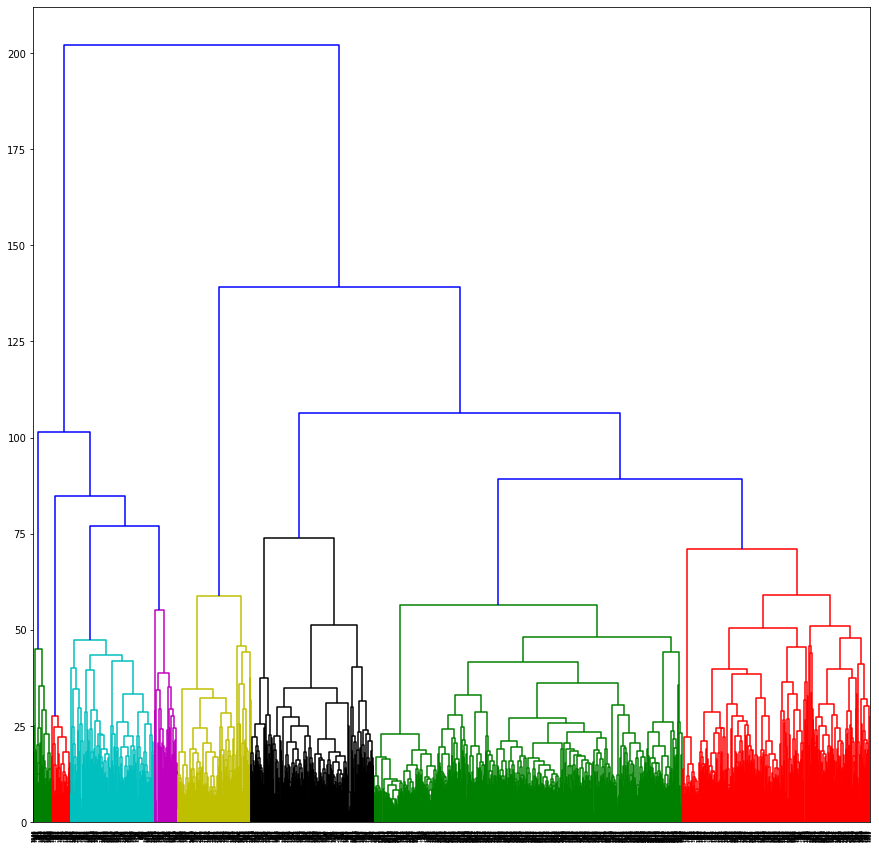

In [6]:
mat_lien = linkage(keepcol, method='ward', metric='euclidean')
fig = plt.figure(figsize=(15,15))
dendrogram(mat_lien, orientation='top', color_threshold=75)
plt.show()

In [7]:
cah = fcluster(mat_lien, t = 75, criterion = 'distance')  
cah = cah-1
cah = pd.Series(cah)
cah.value_counts()

6    809
7    490
5    320
2    220
4    191
3     60
1     50
0     47
dtype: int64

- En Observant ces Techniques de catégorisation, on cherche a démontrer que nous pouvons rendre de ce text une information qui divise les texts en 7 catégories.

In [8]:
res = KMeans(n_clusters = 7, random_state=7).fit_predict(keepcol)

In [9]:
pd.Series(res).value_counts()

2    930
1    389
6    342
5    175
0    149
3    148
4     54
dtype: int64

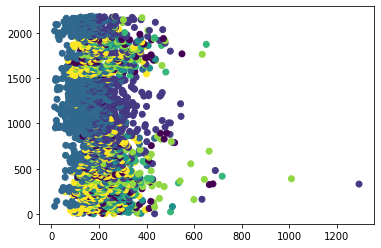

In [10]:
plt.scatter(Descroccurence.sum(axis=1),range(0,2187),c=res)

In [11]:
cof = confusion_matrix(cah ,res )
cof

array([[  0,   0,   0,   0,  45,   2,   0,   0],
       [  0,   1,   0,   3,   0,   0,  46,   0],
       [  2,  12,   0,  86,   0,   0, 120,   0],
       [  7,   0,   0,  53,   0,   0,   0,   0],
       [  1,   2,  10,   0,   9, 166,   3,   0],
       [109,   8,  77,   5,   0,   6, 115,   0],
       [  1, 114, 675,   0,   0,   1,  18,   0],
       [ 29, 252, 168,   1,   0,   0,  40,   0]], dtype=int64)

- Je sélectionne donc le Kmeans avec 7 clusers pour categoriser mon dataset

In [3]:
def getdummiesmots(data):
    stop_words= ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelqu","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô","of","for","at","in","and","the","to",'be',"it","we","an","are","a's" , "able" , "about" , "above" , "according" , "accordingly" , "across" , "actually" , "after" , "afterwards" , "again" , "against" , "ain't" , "all" , "allow" , "allows" , "almost" , "alone" , "along" , "already" , "also" , "although" , "always" , "am" , "among" , "amongst" , "an" , "and" , "another" , "any" , "anybody" , "anyhow" , "anyone" , "anything" , "anyway" , "anyways" , "anywhere" , "apart" , "appear" , "appreciate" , "appropriate" , "are" , "aren't" , "around" , "as" , "aside" , "ask" , "asking" , "associated" , "at" , "available" , "away" , "awfully" , "be" , "became" , "because" , "become" , "becomes" , "becoming" , "been" , "before" , "beforehand" , "behind" , "being" , "believe" , "below" , "beside" , "besides" , "best" , "better" , "between" , "beyond" , "both" , "brief" , "but" , "by" , "c'mon" , "c's" , "came" , "can" , "can't" , "cannot" , "cant" , "cause" , "causes" , "certain" , "certainly" , "changes" , "clearly" , "co" , "com" , "come" , "comes" , "concerning" , "consequently" , "consider" , "considering" , "contain" , "containing" , "contains" , "corresponding" , "could" , "couldn't" , "course" , "currently" , "definitely" , "described" , "despite" , "did" , "didn't" , "different" , "do" , "does" , "doesn't" , "doing" , "don't" , "done" , "down" , "downwards" , "during" , "each" , "edu" , "eg" , "eight" , "either" , "else" , "elsewhere" , "enough" , "entirely" , "especially" , "et" , "etc" , "even" , "ever" , "every" , "everybody" , "everyone" , "everything" , "everywhere" , "ex" , "exactly" , "example" , "except" , "far" , "few" , "fifth" , "first" , "five" , "followed" , "following" , "follows" , "for" , "former" , "formerly" , "forth" , "four" , "from" , "further" , "furthermore" , "get" , "gets" , "getting" , "given" , "gives" , "go" , "goes" , "going" , "gone" , "got" , "gotten" , "greetings" , "had" , "hadn't" , "happens" , "hardly" , "has" , "hasn't" , "have" , "haven't" , "having" , "he" , "he's" , "hello" , "help" , "hence" , "her" , "here" , "here's" , "hereafter" , "hereby" , "herein" , "hereupon" , "hers" , "herself" , "hi" , "him" , "himself" , "his" , "hither" , "hopefully" , "how" , "howbeit" , "however" , "i'd" , "i'll" , "i'm" , "i've" , "ie" , "if" , "ignored" , "immediate" , "in" , "inasmuch" , "inc" , "indeed" , "indicate" , "indicated" , "indicates" , "inner" , "insofar" , "instead" , "into" , "inward" , "is" , "isn't" , "it" , "it'd" , "it'll" , "it's" , "its" , "itself" , "just" , "keep" , "keeps" , "kept" , "know" , "known" , "knows" , "last" , "lately" , "later" , "latter" , "latterly" , "least" , "less" , "lest" , "let" , "let's" , "like" , "liked" , "likely" , "little" , "look" , "looking" , "looks" , "ltd" , "mainly" , "many" , "may" , "maybe" , "me" , "mean" , "meanwhile" , "merely" , "might" , "more" , "moreover" , "most" , "mostly" , "much" , "must" , "my" , "myself" , "name" , "namely" , "nd" , "near" , "nearly" , "necessary" , "need" , "needs" , "neither" , "never" , "nevertheless" , "new" , "next" , "nine" , "no" , "nobody" , "non" , "none" , "noone" , "nor" , "normally" , "not" , "nothing" , "novel" , "now" , "nowhere" , "obviously" , "of" , "off" , "often" , "oh" , "ok" , "okay" , "old" , "on" , "once" , "one" , "ones" , "only" , "onto" , "or" , "other" , "others" , "otherwise" , "ought" , "our" , "ours" , "ourselves" , "out" , "outside" , "over" , "overall" , "own" , "particular" , "particularly" , "per" , "perhaps" , "placed" , "please" , "plus" , "possible" , "presumably" , "probably" , "provides" , "que" , "quite" , "qv" , "rather" , "rd" , "re" , "really" , "reasonably" , "regarding" , "regardless" , "regards" , "relatively" , "respectively" , "right" , "said" , "same" , "saw" , "say" , "saying" , "says" , "second" , "secondly" , "see" , "seeing" , "seem" , "seemed" , "seeming" , "seems" , "seen" , "self" , "selves" , "sensible" , "sent" , "serious" , "seriously" , "seven" , "several" , "shall" , "she" , "should" , "shouldn't" , "since" , "six" , "so" , "some" , "somebody" , "somehow" , "someone" , "something" , "sometime" , "sometimes" , "somewhat" , "somewhere" , "soon" , "sorry" , "specified" , "specify" , "specifying" , "still" , "sub" , "such" , "sup" , "sure" , "t's" , "take" , "taken" , "tell" , "tends" , "th" , "than" , "thank" , "thanks" , "thanx" , "that" , "that's" , "thats" , "the" , "their" , "theirs" , "them" , "themselves" , "then" , "thence" , "there" , "there's" , "thereafter" , "thereby" , "therefore" , "therein" , "theres" , "thereupon" , "these" , "they" , "they'd" , "they'll" , "they're" , "they've" , "think" , "third" , "this" , "thorough" , "thoroughly" , "those" , "though" , "three" , "through" , "throughout" , "thru" , "thus" , "to" , "together" , "too" , "took" , "toward" , "towards" , "tried" , "tries" , "truly" , "try" , "trying" , "twice" , "two" , "un" , "under" , "unfortunately" , "unless" , "unlikely" , "until" , "unto" , "up" , "upon" , "us" , "use" , "used" , "useful" , "uses" , "using" , "usually" , "value" , "various" , "very" , "via" , "viz" , "vs" , "want" , "wants" , "was" , "wasn't" , "way" , "we" , "we'd" , "we'll" , "we're" , "we've" , "welcome" , "well" , "went" , "were" , "weren't" , "what" , "what's" , "whatever" , "when" , "whence" , "whenever" , "where" , "where's" , "whereafter" , "whereas" , "whereby" , "wherein" , "whereupon" , "wherever" , "whether" , "which" , "while" , "whither" , "who" , "who's" , "whoever" , "whole" , "whom" , "whose" , "why" , "will" , "willing" , "wish" , "with" , "within" , "without" , "won't" , "wonder" , "would" , "wouldn't" , "yes" , "yet" , "you" , "you'd" , "you'll" , "you're" , "you've" , "your" , "yours" , "yourself" , "yourselves" , "zero",'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
    vektor = CountVectorizer(stop_words=stop_words)
    Descroccurence = vektor.fit_transform(data['Description'])
    Descroccurence = pd.DataFrame(Descroccurence.toarray(),columns= vektor.get_feature_names())
    #Je récupere les 200 mots les plus présents
    x = Descroccurence.sum()
    listed = x.sort_values(ascending=False)[:200]
    keepcol = listed.keys()
    keepcol = Descroccurence[keepcol]
    return keepcol

In [4]:
def categorisersalaire(data):
    for k, v in data.iterrows():
        if v['Salary'] == 'notfound':
            data['Salary'][k] = 'notfound'
        else:
            if int(v['Salary']) <=25000 : 
                data['Salary'][k] = 'moinsde25Kans'
            else:
                if int(v['Salary']) <=60000 : 
                    data['Salary'][k] = '25a60Kans'
                else : 
                    if int(v['Salary']) >=1000000 : 
                        data['Salary'][k] = 'millionnairestoutlesans'
                    else:
                        data['Salary'][k] = '60a200Kans'
    return data

In [5]:
def cleancsvcleaned(data):
    descoccurence = getdummiesmots(data)#Je récuperes les occurences
    res = KMeans(n_clusters = 7, random_state=7).fit_predict(descoccurence)#jeprédit les catégories
    data = data.reset_index(drop=True)
    Withdeuxcentdummies = pd.concat([data,descoccurence],axis=1)
    Withcategorie = pd.concat([data,pd.DataFrame(res,columns=["Desc_categ"])],axis=1)
    data = categorisersalaire(data)#Je catégorises les salaires
    SalarycategWithdeuxcentdummies = pd.concat([data,descoccurence],axis=1)
    SalarycategWithcategorie = pd.concat([data,pd.DataFrame(res,columns=["Desc_categ"])],axis=1)
    #J'enregistre tout les csv
    Withdeuxcentdummies.to_csv('data/rdyforml/1.csv', index=False)
    Withcategorie.to_csv('data/rdyforml/11.csv', index=False)
    SalarycategWithdeuxcentdummies.to_csv('data/rdyforml/111.csv', index=False)
    SalarycategWithcategorie.to_csv('data/rdyforml/1111.csv', index=False)

In [6]:
cleancsvcleaned(data)

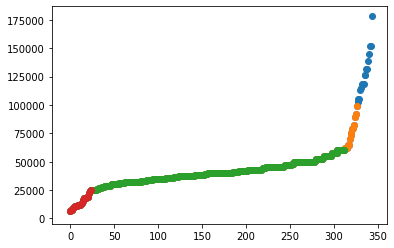

In [105]:
y.astype(int)
y[y <=200000].sort_values()
plt.scatter(range(344),y[y <=200000].sort_values())
y[y <=100000].sort_values()
plt.scatter(range(327),y[y <=100000].sort_values())
y[y <=60000].sort_values()
plt.scatter(range(313),y[y <=60000].sort_values())
y[y <=25000].sort_values()
plt.scatter(range(24),y[y <=25000].sort_values())

-ITERER SUR LES NOMS DE COLLONE AVEC UN LEVENSTEIN > 3 POUR LES RECUPERER TOUTES EN 1 WALLILA

In [6]:
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print (matrix[size_x - 1, size_y - 1])
    return matrix

In [7]:
levenshtein("donner","donner")

array([[0., 1., 2., 3., 4., 5., 6.],
       [1., 0., 1., 2., 3., 4., 5.],
       [2., 1., 0., 1., 2., 3., 4.],
       [3., 2., 1., 0., 1., 2., 3.],
       [4., 3., 2., 1., 0., 1., 2.],
       [5., 4., 3., 2., 1., 0., 1.],
       [6., 5., 4., 3., 2., 1., 0.]])

In [8]:
def mergecolwithLevenshtein(occurencedf):
    dd = dict()
    cols = []
    for i in occurencedf.columns:
        cols.append(i)
        if len(cols) >=0 :
            if '_' in i :
                dd[i] = Descroccurence[i]
            else :
                if re.search(r'[0-9\W]', i) == None :
                    for k in list(dd):
                        if re.search(r'[0-9\W]', k) == None :
                            if '_'in k :
                                dd[k] = Descroccurence[i]
                            else: 
                                if levenshtein(str(i),str(k))<=3.0 :
                                    try : 
                                        dd[k] += Descroccurence[i]
                                    except :
                                        dd[k] = Descroccurence[i]
                                else: 
                                    dd[i] = Descroccurence[i]
                        else:
                            if levenshtein(str(i),str(k)).any() <=3.0 :
                                try : 
                                    dd[k] += Descroccurence[i]
                                except :
                                    dd[k] = Descroccurence[i]
                            else: 
                                dd[i] = Descroccurence[i]
                else:
                    dd[i] = Descroccurence[i]
        else:
            dd[i] = Descroccurence[i]
    data = pd.DataFrame.from_dict(dd)
    return data

In [ ]:
doto = mergecolwithLevenshtein(Descroccurence)

In [106]:
print(Descroccurence.shape, data.shape)

(2187, 27700) (2187, 17)
